In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from google.colab.drive import mount
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

sns.set_style('darkgrid')

In [2]:
mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
ratings_df = pd.read_csv("/content/drive/MyDrive/Dataset/animelist.csv")
anime_df = pd.read_csv("/content/drive/MyDrive/Dataset/anime.csv")

In [ ]:
print(f"Jumlah data penilaian anime: {len(ratings_df['anime_id'].unique())}")
print(f"Jumlah data anime: {len(anime_df['MAL_ID'].unique())}")

Jumlah data penilaian anime: 17562
Jumlah data anime: 17562


### EDA (Exploratory Data Analysis)

-   Deskriptif Data
-   Univariate Analysis


In [ ]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109224747 entries, 0 to 109224746
Data columns (total 5 columns):
 #   Column            Dtype
---  ------            -----
 0   user_id           int64
 1   anime_id          int64
 2   rating            int64
 3   watching_status   int64
 4   watched_episodes  int64
dtypes: int64(5)
memory usage: 4.1 GB


In [ ]:
ratings_df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,109224747.0,176809.803391,101848.727790,0.0,88491.0,177142.0,265187.0,353404.0
anime_id,109224747.0,16495.898684,13797.366207,1.0,3194.0,12445.0,30831.0,48492.0
rating,109224747.0,4.245717,3.912888,0.0,0.0,5.0,8.0,10.0
watching_status,109224747.0,3.087289,1.774407,0.0,2.0,2.0,6.0,55.0
watched_episodes,109224747.0,12.108177,146.315462,0.0,0.0,3.0,12.0,65535.0


In [ ]:
ratings_df.head()

,user_id,anime_id,rating,watching_status,watched_episodes
0,0,67,9,1,1
1,0,6702,7,1,4
2,0,242,10,1,4
3,0,4898,0,1,1
4,0,21,10,1,0


In [ ]:
print(f'Jumlah pengguna {len(ratings_df["user_id"].unique())}')
print(f'Jumlah anime {len(ratings_df["anime_id"].unique())}')
print(f"Jumlah data rating {len(ratings_df)}")

Jumlah pengguna 325770
Jumlah anime 17562
Jumlah data rating 109224747


In [9]:
ratings_df['rating'].value_counts()

rating
0     46827035
8     15422150
7     14244633
9     10235934
6      7543377
10     7144392
5      4029645
4      1845854
3       905700
2       545339
1       480688
Name: count, dtype: int64

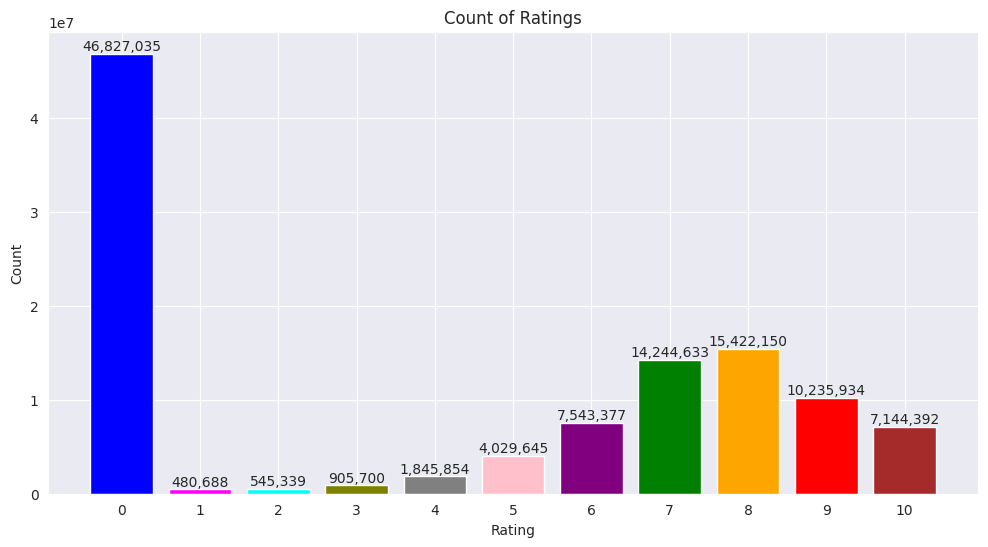

In [11]:
ratings = [0, 8, 7, 9, 6, 10, 5, 4, 3, 2, 1]
counts = [46827035, 15422150, 14244633, 10235934, 7543377, 7144392, 4029645, 1845854, 905700, 545339, 480688]
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta']

plt.figure(figsize=(12, 6))
bars = plt.bar(ratings, counts, color=colors)

for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{count:,}', ha='center', va='bottom')

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Ratings')
plt.xticks(ratings)
plt.show()

In [ ]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [ ]:
anime_df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [ ]:
print(f"Jumlah anime: {len(anime_df['MAL_ID'].unique())}")

print(
    f"Jumlah genre: {len(anime_df['Genres'].str.split(', ', expand=True).stack().unique())}"
)
print(f"Genre: {anime_df['Genres'].str.split(', ', expand=True).stack().unique()[:10]}")

print(f"Jumlah type: {len(anime_df['Type'].unique())}")
print(f"Type: {anime_df['Type'].unique()}")

print(
    f"Jumlah studio: {len(anime_df['Studios'].str.split(', ', expand=True).stack().unique())}"
)
print(
    f"Studio: {anime_df['Studios'].str.split(', ', expand=True).stack().unique()[:10]}"
)

print(f"Jumlah source: {len(anime_df['Source'].unique())}")
print(f"Source: {anime_df['Source'].unique()}")

Jumlah anime: 17562
Jumlah genre: 44
Genre: ['Action' 'Adventure' 'Comedy' 'Drama' 'Sci-Fi' 'Space' 'Mystery'
 'Shounen' 'Police' 'Supernatural']
Jumlah type: 7
Type: ['TV' 'Movie' 'OVA' 'Special' 'ONA' 'Music' 'Unknown']
Jumlah studio: 723
Studio: ['Sunrise' 'Bones' 'Madhouse' 'Toei Animation' 'Gallop' 'J.C.Staff'
 'Nippon Animation' 'A.C.G.T.' 'Studio Pierrot' 'Trans Arts']
Jumlah source: 16
Source: ['Original' 'Manga' 'Light novel' 'Game' 'Visual novel' '4-koma manga'
 'Novel' 'Unknown' 'Other' 'Picture book' 'Web manga' 'Music' 'Radio'
 'Book' 'Card game' 'Digital manga']


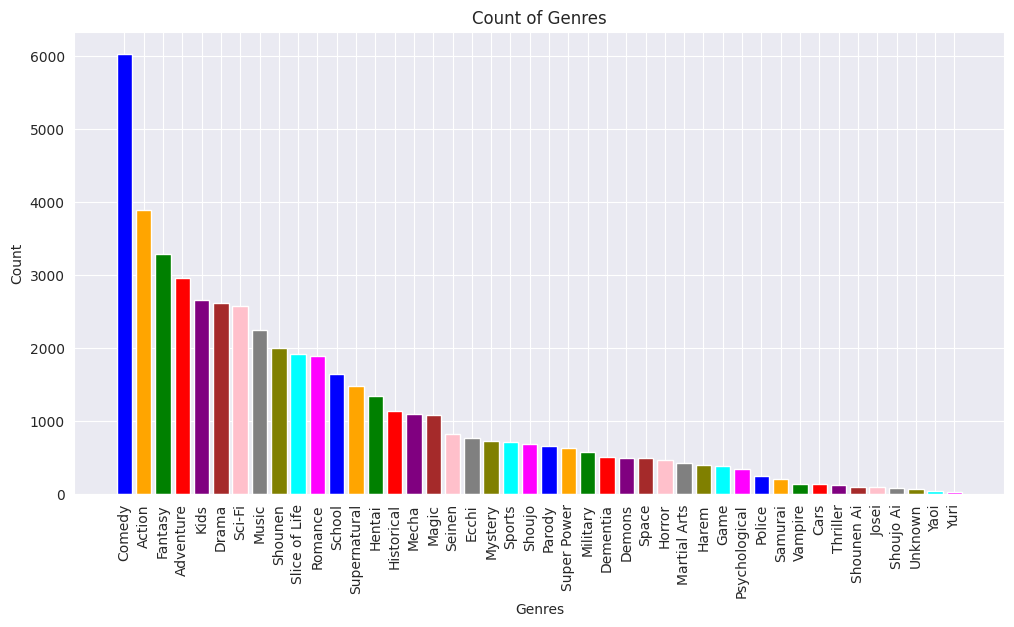

In [31]:
genres = anime_df['Genres'].str.split(', ', expand=True).stack().value_counts().index
counts = anime_df['Genres'].str.split(', ', expand=True).stack().value_counts().values


plt.figure(figsize=(12, 6))
bars = plt.bar(genres, counts, color=colors)

plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Count of Genres')
plt.xticks(genres, rotation=90)
plt.show()

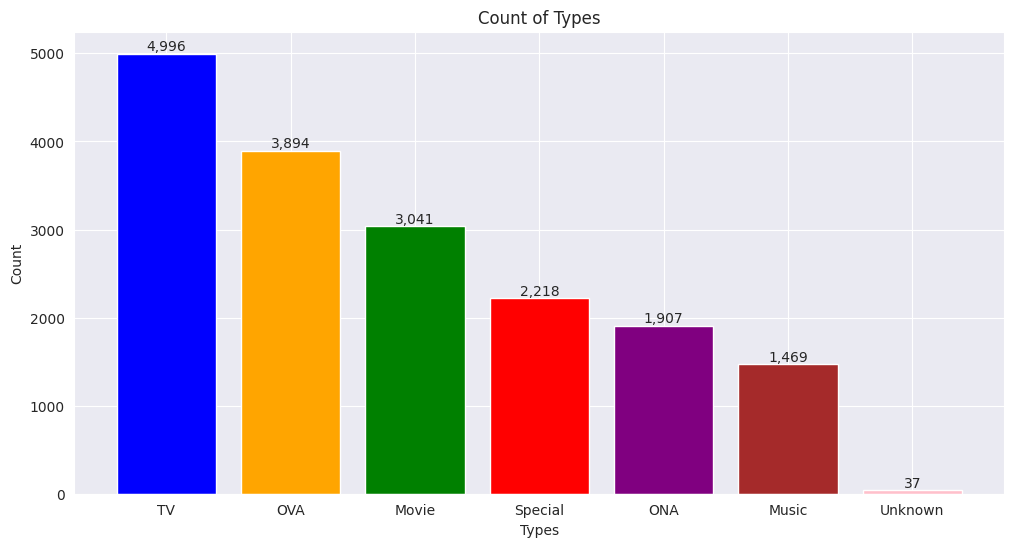

In [34]:
types = anime_df['Type'].str.split(', ', expand=True).stack().value_counts().index
counts = anime_df['Type'].str.split(', ', expand=True).stack().value_counts().values


plt.figure(figsize=(12, 6))
bars = plt.bar(types, counts, color=colors)

for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{count:,}', ha='center', va='bottom')

plt.xlabel('Types')
plt.ylabel('Count')
plt.title('Count of Types')
plt.xticks(types)
plt.show()

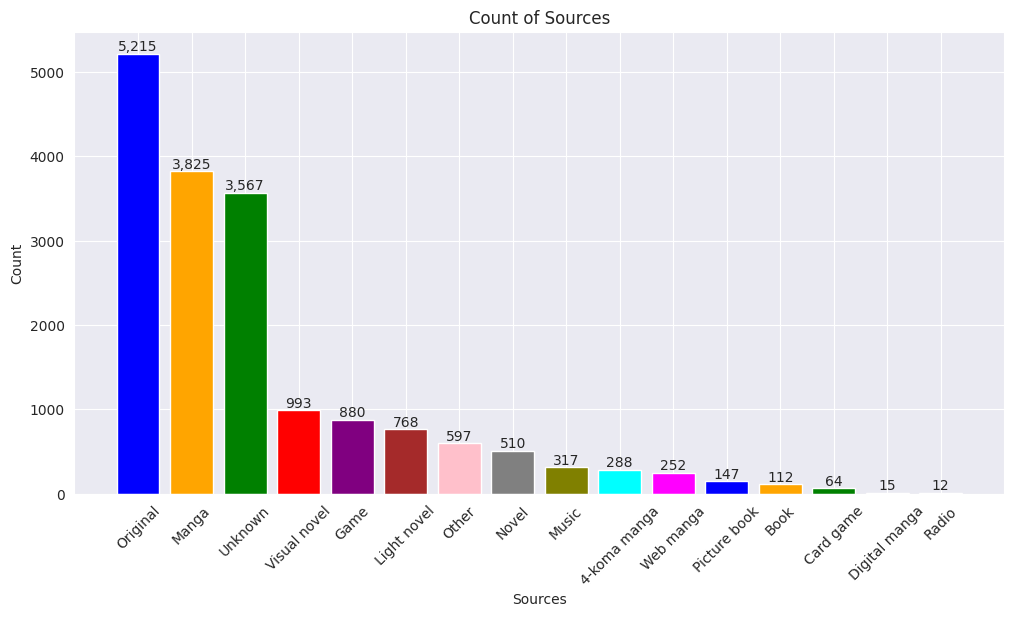

In [37]:
sources = anime_df['Source'].str.split(', ', expand=True).stack().value_counts().index
counts = anime_df['Source'].str.split(', ', expand=True).stack().value_counts().values


plt.figure(figsize=(12, 6))
bars = plt.bar(sources, counts, color=colors)

for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{count:,}', ha='center', va='bottom')

plt.xlabel('Sources')
plt.ylabel('Count')
plt.title('Count of Sources')
plt.xticks(sources, rotation=45)
plt.show()

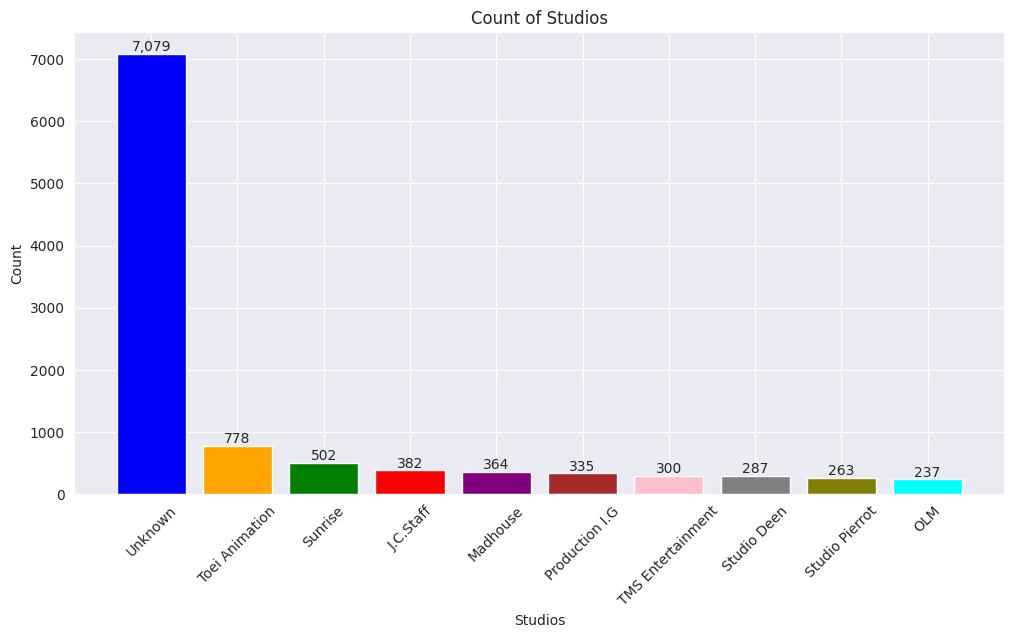

In [40]:
studios = anime_df['Studios'].str.split(', ', expand=True).stack().value_counts().index[:10]
counts = anime_df['Studios'].str.split(', ', expand=True).stack().value_counts().values[:10]


plt.figure(figsize=(12, 6))
bars = plt.bar(studios, counts, color=colors)

for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{count:,}', ha='center', va='bottom')

plt.xlabel('Studios')
plt.ylabel('Count')
plt.title('Count of Studios')
plt.xticks(studios, rotation=45)
plt.show()

### Data Preprocessing

-   Mengambil kolom tertentu
-   Membuang unknown values
-   Menggabungkan beberapa fitur anime menjadi satu


In [ ]:
all_ratings = ratings_df[["anime_id", "user_id", "rating"]]
all_anime = anime_df[["MAL_ID", "Name", "Genres", "Type", "Studios", "Source"]]

In [ ]:
all_ratings.head()

,anime_id,user_id,rating
0,67,0,9
1,6702,0,7
2,242,0,10
3,4898,0,0
4,21,0,10


In [ ]:
all_anime.head()

,MAL_ID,Name,Genres,Type,Studios,Source
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,Sunrise,Original
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,Bones,Original
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,Madhouse,Manga
3,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ...",TV,Sunrise,Original
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural",TV,Toei Animation,Manga


In [ ]:
all_ratings.isna().sum()

anime_id    0
user_id     0
rating      0
dtype: int64

In [ ]:
all_anime.isna().sum()

MAL_ID     0
Name       0
Genres     0
Type       0
Studios    0
Source     0
dtype: int64

In [ ]:
all_anime["Genres"].str.split(", ", expand=True).stack().unique()

array(['Action', 'Adventure', 'Comedy', 'Drama', 'Sci-Fi', 'Space',
       'Mystery', 'Shounen', 'Police', 'Supernatural', 'Magic', 'Fantasy',
       'Sports', 'Josei', 'Romance', 'Slice of Life', 'Cars', 'Seinen',
       'Horror', 'Psychological', 'Thriller', 'Super Power',
       'Martial Arts', 'School', 'Ecchi', 'Vampire', 'Military',
       'Historical', 'Dementia', 'Mecha', 'Demons', 'Samurai', 'Game',
       'Shoujo', 'Harem', 'Music', 'Shoujo Ai', 'Shounen Ai', 'Kids',
       'Hentai', 'Parody', 'Yuri', 'Yaoi', 'Unknown'], dtype=object)

In [ ]:
all_anime["Type"].str.split(", ", expand=True).stack().unique()

array(['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Music', 'Unknown'],
      dtype=object)

In [ ]:
all_anime["Source"].str.split(", ", expand=True).stack().unique()

array(['Original', 'Manga', 'Light novel', 'Game', 'Visual novel',
       '4-koma manga', 'Novel', 'Unknown', 'Other', 'Picture book',
       'Web manga', 'Music', 'Radio', 'Book', 'Card game',
       'Digital manga'], dtype=object)

In [ ]:
def process_multilabel(series):
    series = series.split(", ")
    if "Unknown" in series:
        series.remove("Unknown")
    return ", ".join(series)


all_anime.loc[:, "Genres"] = all_anime["Genres"].map(process_multilabel)
all_anime.loc[:, "Source"] = all_anime["Source"].map(process_multilabel)
all_anime.loc[:, "Type"] = all_anime["Type"].map(process_multilabel)

all_anime.head()

,MAL_ID,Name,Genres,Type,Studios,Source
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,Sunrise,Original
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,Bones,Original
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,Madhouse,Manga
3,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ...",TV,Sunrise,Original
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural",TV,Toei Animation,Manga


In [ ]:
all_anime.loc[:, "features"] = (
    all_anime["Genres"] + " " + all_anime["Type"] + " " + all_anime["Source"]
)

all_anime.head()

<ipython-input-21-33bc4ef2c61e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_anime.loc[:, 'features'] = all_anime['Genres'] + " " + all_anime['Type'] + " " + all_anime['Source']


,MAL_ID,Name,Genres,Type,Studios,Source,features
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,Sunrise,Original,"Action, Adventure, Comedy, Drama, Sci-Fi, Spac..."
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,Bones,Original,"Action, Drama, Mystery, Sci-Fi, Space Movie Or..."
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,Madhouse,Manga,"Action, Sci-Fi, Adventure, Comedy, Drama, Shou..."
3,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ...",TV,Sunrise,Original,"Action, Mystery, Police, Supernatural, Drama, ..."
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural",TV,Toei Animation,Manga,"Adventure, Fantasy, Shounen, Supernatural TV M..."


### Modeling

#### 1. Content-Based Filtering

-   Tahapan pertama adalah data preprocessing, di mana data dari dataset dipersiapkan untuk digunakan dalam pembuatan model. Untuk lebih detail sudah dijelaskan pada bagian [data preparation](#data-preparation)

-   Fitur yang merupakan gabungan dari beberapa fitur akan dilakukan feature extraction menggunakan TF-IDF dan diubah menjadi sebuah matrix yang merepresentasikan fitur yang sudah diekstrak dari masing-masing anime.

-   Matrix yang dihasilkan akan digunakan untuk mengukur kemiripan antar anime dengan menggunakan distance metric cosine similarity. Sebuah matrix kembali dihasilkan yang nilainya antara 0-1, dimana semakin mendekati 1 maka anime tersebut semakin mirip, semakin mendekati 0 maka anime tersebut semakin berbeda.

-   Hasil dari cosine similarity digunakan untuk mencari anime yang mirip dengan anime yang sedang dicari atau ditonton oleh user, dimana akan ditampilkan top 10 anime yang mirip berdasarkan hasil cosine similarity.

#### 2. Collaborative Filtering

-   Karena keterbatasan resource hardware, dataset animelist.csv akan disampel sebanyak 100.000 data saja, karena data aslinya yang terlalu besar, yaitu mencapai 100 juta sampel.

-   Dilakukan encoding pada user_id dan anime_id, dan rating akan discaling menjadi 0-1 menggunakan metode MinMaxScaler.

-   Data akan diacak terlebih dahulu, lalu dibagi menjadi data latih dan data uji dengan proporsi 95% data latih, 5% data uji.

-   Model deep learning akan dilatih pada data latih dan divalidasi menggunakan data uji, dengan jumlah epochs sebanyak 20. Optimizer yang digunakan adalah Adam dengan learning rate 0.001, dan fungsi metriks yang digunakan MAE dan MSE.


In [ ]:
tfidf = TfidfVectorizer()

tfidf.fit(all_anime["features"])

tfidf.get_feature_names_out()

array(['action', 'adventure', 'ai', 'arts', 'book', 'card', 'cars',
       'comedy', 'dementia', 'demons', 'digital', 'drama', 'ecchi',
       'fantasy', 'fi', 'game', 'harem', 'hentai', 'historical', 'horror',
       'josei', 'kids', 'koma', 'life', 'light', 'magic', 'manga',
       'martial', 'mecha', 'military', 'movie', 'music', 'mystery',
       'novel', 'of', 'ona', 'original', 'other', 'ova', 'parody',
       'picture', 'police', 'power', 'psychological', 'radio', 'romance',
       'samurai', 'school', 'sci', 'seinen', 'shoujo', 'shounen', 'slice',
       'space', 'special', 'sports', 'super', 'supernatural', 'thriller',
       'tv', 'vampire', 'visual', 'web', 'yaoi', 'yuri'], dtype=object)

In [ ]:
tfidf_matrix = tfidf.fit_transform(all_anime["features"])

tfidf_matrix.shape

(17562, 65)

In [ ]:
tfidf_matrix.todense()

matrix([[0.29034343, 0.32202626, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.27597474, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.31275519, 0.34688363, 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.37902948, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.44166822, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfidf.get_feature_names_out(),
    index=all_anime["Name"],
).sample(22, axis=1).sample(10, axis=0)

,martial,light,sci,magic,ai,picture,life,harem,adventure,ecchi,...,manga,card,mecha,of,space,kids,comedy,shoujo,thriller,romance
Name,,,,,,,,,,,,,,,,,,,,,
Yuru Yuri♪♪,0.0,0.0,0.000000,0.0,0.543096,0.0,0.312672,0.0,0.000000,0.000000,...,0.232216,0.0,0.000000,0.312672,0.000000,0.000000,0.201156,0.402392,0.0,0.000000
Peeping Life: Tezuka Pro - Tatsunoko Pro Wonderland,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.385022,0.000000,0.0,0.000000
Transformers: Choujin Master Force,0.0,0.0,0.397652,0.0,0.000000,0.0,0.000000,0.0,0.379222,0.000000,...,0.000000,0.0,0.513850,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
School Rumble San Gakki,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.345622,0.0,0.000000,0.000000,0.000000,0.000000,0.299394,0.000000,0.0,0.466509
Mobile Suit Gundam 0083: Stardust Memory - The Mayfly of Space,0.0,0.0,0.228377,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.295111,0.000000,0.357623,0.000000,0.000000,0.000000,0.0,0.000000
Kobara Support x Kamiusagi Rope,0.0,0.0,0.000000,0.0,0.000000,0.0,0.452210,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.452210,0.000000,0.000000,0.290927,0.000000,0.0,0.000000
Cuticle Tantei Inaba,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.306621,0.0,0.000000,0.000000,0.000000,0.000000,0.265609,0.000000,0.0,0.000000
Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu,0.0,0.0,0.408434,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.334499,0.0,0.000000,0.000000,0.000000,0.000000,0.289759,0.000000,0.0,0.000000
Sekai de Ichiban Tsuyoku Naritai! Specials,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.581583,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.7324852 , 0.70521029, ..., 0.04663483, 0.2699809 ,
        0.23211343],
       [0.7324852 , 1.        , 0.43545467, ..., 0.15228201, 0.        ,
        0.12188927],
       [0.70521029, 0.43545467, 1.        , ..., 0.05023459, 0.38778784,
        0.25003038],
       ...,
       [0.04663483, 0.15228201, 0.05023459, ..., 1.        , 0.05488985,
        0.07094054],
       [0.2699809 , 0.        , 0.38778784, ..., 0.05488985, 1.        ,
        0.12226584],
       [0.23211343, 0.12188927, 0.25003038, ..., 0.07094054, 0.12226584,
        1.        ]])

In [ ]:
cosine_sim_df = pd.DataFrame(
    cosine_sim, index=all_anime["Name"], columns=all_anime["Name"]
)

print(f"Shape: {cosine_sim_df.shape}")

cosine_sim_df.sample(22, axis=1).sample(10, axis=0)

Shape: (17562, 17562)


Name,Hybrid Child,Sore Ike! Anpanman: Baikinman vs. Baikinman!?,Supermarket Flowers,Maki to Kanta to Jiijii to.,Lupin III: Twilight Gemini no Himitsu,Naita Aka Oni (OVA),Bible Black Gaiden,Ichimai no Etegami,Yahari Ore no Seishun Love Comedy wa Machigatteiru. Zoku OVA,Kiddy GiRL-AND,...,Taiyou no Yuusha Fighbird,Dayan to Tama to Tobi Neko to: 3-tsu no Neko no Monogatari,Yami no Teio: Kyuuketsuki Dracula,Chocotto Sister,Otome no Inori,Hajimari no Sokudo,One Piece Movie 5: Norowareta Seiken,Zukkoke Sannin-gumi no Jitensha Kyoushitsu,Totsugeki! Pappara-tai,Masuda Kousuke Gekijou Gag Manga Biyori
Name,,,,,,,,,,,,,,,,,,,,,
Donguri to Yamaneko (1995),0.172288,0.188980,0.000000,0.218748,0.000000,0.785498,0.100238,0.569728,0.097382,0.000000,...,0.000000,0.130709,0.000000,0.140123,0.000000,0.000000,0.000000,0.420811,0.000000,0.000000
Upotte!!: Miatte Waratte,0.131762,0.091193,0.000000,0.000000,0.077909,0.105743,0.094058,0.145791,0.318826,0.055084,...,0.000000,0.000000,0.000000,0.422002,0.000000,0.000000,0.120042,0.107683,0.147984,0.192496
La Rose de Versailles,0.335557,0.000000,0.000000,0.191396,0.159806,0.132270,0.000000,0.182364,0.141008,0.000000,...,0.000000,0.000000,0.123373,0.273852,0.000000,0.000000,0.000000,0.134697,0.143623,0.000000
Ni-hiki no Sanma,0.000000,0.553983,0.000000,0.666758,0.170814,0.000000,0.000000,0.000000,0.136558,0.259062,...,0.000000,0.244878,0.000000,0.146477,0.000000,0.000000,0.312622,0.000000,0.139091,0.180929
Akagami no Shirayuki-hime,0.329614,0.186517,0.000000,0.250952,0.000000,0.173428,0.000000,0.239109,0.184884,0.080133,...,0.106298,0.000000,0.000000,0.565107,0.000000,0.000000,0.189101,0.176610,0.383965,0.254503
Choujin Locke: Lord Leon,0.335695,0.000000,0.000000,0.000000,0.120515,0.111356,0.099050,0.153529,0.096228,0.822191,...,0.418800,0.000000,0.000000,0.093759,0.000000,0.000000,0.625000,0.113399,0.452640,0.115811
Detective Conan OVA 11: A Secret Order from London,0.241416,0.092150,0.000000,0.000000,0.400223,0.106853,0.095045,0.147320,0.155275,0.055662,...,0.000000,0.115169,0.000000,0.157477,0.000000,0.000000,0.333661,0.108813,0.265373,0.194516
Anokoro no Namida wa,0.000000,0.176399,0.675675,0.118802,0.000000,0.139421,0.000000,0.192223,0.000000,0.062745,...,0.000000,0.122008,0.000000,0.000000,0.517023,0.675675,0.000000,0.141980,0.000000,0.000000
Kimi ni Sekai,0.161673,0.131886,0.880798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.189229,...,0.251015,0.000000,0.000000,0.000000,0.673982,0.880798,0.074425,0.000000,0.217936,0.000000


In [ ]:
def anime_recommendation(
    nama_anime: str,
    similarity_data=cosine_sim_df,
    items=all_anime[["Name", "Genres", "Studios", "Type", "Source"]],
    k=10,
):
    """
    Rekomendasi Anime berdasarkan kemiripan dataframe

    Parameter:
    ---
    nama_anime : tipe data string (str)
                Nama Anime (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan anime sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = (
        similarity_data.loc[:, nama_anime].to_numpy().argpartition(range(-1, -k, -1))
    )

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1 : -(k + 2) : -1]]

    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_anime, errors="ignore")

    print("=========" * 10)
    print(f"Top {k} anime yang mirip dengan: {nama_anime}")
    print("=========" * 10)

    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
anime_recommendation("Dragon Ball Z")

Top 10 anime yang mirip dengan: Dragon Ball Z


,Name,Genres,Studios,Type,Source
0,Dragon Ball Kai,"Action, Adventure, Comedy, Fantasy, Martial Ar...",Toei Animation,TV,Manga
1,Dragon Ball Super,"Action, Adventure, Comedy, Super Power, Martia...",Toei Animation,TV,Manga
2,Dragon Ball Kai (2014),"Action, Adventure, Comedy, Super Power, Martia...",Toei Animation,TV,Manga
3,Dragon Ball,"Adventure, Comedy, Fantasy, Martial Arts, Shou...",Toei Animation,TV,Manga
4,Naruto,"Action, Adventure, Comedy, Super Power, Martia...",Studio Pierrot,TV,Manga
5,Naruto: Shippuuden,"Action, Adventure, Comedy, Super Power, Martia...",Studio Pierrot,TV,Manga
6,Dragon Ball Z: Atsumare! Gokuu World,"Action, Adventure, Comedy, Super Power, Martia...",Toei Animation,OVA,Manga
7,Boruto: Naruto Next Generations,"Action, Adventure, Super Power, Martial Arts, ...",Studio Pierrot,TV,Manga
8,Rekka no Honoo,"Action, Adventure, Martial Arts, Shounen, Supe...",Studio Pierrot,TV,Manga
9,"Dragon Ball Z Movie 15: Fukkatsu no ""F""","Action, Adventure, Comedy, Super Power, Martia...",Toei Animation,Movie,Manga


In [ ]:
anime_recommendation("Fullmetal Alchemist: Brotherhood")

Top 10 anime yang mirip dengan: Fullmetal Alchemist: Brotherhood


,Name,Genres,Studios,Type,Source
0,Fullmetal Alchemist,"Action, Adventure, Comedy, Drama, Fantasy, Mag...",Bones,TV,Manga
1,Fullmetal Alchemist: The Sacred Star of Milos,"Action, Adventure, Comedy, Drama, Fantasy, Mag...",Bones,Movie,Manga
2,Fullmetal Alchemist: Brotherhood Specials,"Military, Adventure, Drama, Magic, Fantasy, Sh...",Bones,Special,Manga
3,Katsute Kami Datta Kemono-tachi e,"Action, Drama, Fantasy, Military, Shounen",MAPPA,TV,Manga
4,Fairy Tail: Final Series,"Action, Adventure, Comedy, Magic, Fantasy, Sho...","A-1 Pictures, Bridge, CloverWorks",TV,Manga
5,Fairy Tail (2014),"Action, Adventure, Comedy, Fantasy, Magic, Sho...","A-1 Pictures, Bridge",TV,Manga
6,Fairy Tail,"Action, Adventure, Comedy, Magic, Fantasy, Sho...","Satelight, A-1 Pictures",TV,Manga
7,Magi: The Labyrinth of Magic,"Action, Adventure, Fantasy, Magic, Shounen",A-1 Pictures,TV,Manga
8,Magi: Sinbad no Bouken (TV),"Action, Adventure, Fantasy, Magic, Shounen",Lay-duce,TV,Manga
9,Magi: The Kingdom of Magic,"Action, Adventure, Magic, Fantasy, Shounen",A-1 Pictures,TV,Manga


In [ ]:
all_ratings = all_ratings.sample(100_000, random_state=42).reset_index(drop=True)

In [ ]:
duplicates = all_ratings.duplicated()

if duplicates.sum() > 0:
    print("> {} duplicates".format(duplicates.sum()))
    all_ratings = all_ratings[~duplicates]

print("> {} duplicates".format(all_ratings.duplicated().sum()))

> 0 duplicates


In [ ]:
user_ids = all_ratings["user_id"].unique().tolist()
anime_ids = all_ratings["anime_id"].unique().tolist()

# Encoding user id
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded2user = {i: x for i, x in enumerate(user_ids)}

# Encoding anime id
anime2anime_encoded = {x: i for i, x in enumerate(anime_ids)}
anime_encoded2anime = {i: x for i, x in enumerate(anime_ids)}

all_ratings["user"] = all_ratings["user_id"].map(user2user_encoded)
all_ratings["anime"] = all_ratings["anime_id"].map(anime2anime_encoded)

print("Banyak user id: ", len(user_ids))
print("Banyak anime id: ", len(user_ids))

Banyak user id:  74460
Banyak anime id:  74460


In [ ]:
all_ratings.head()

,anime_id,user_id,rating,user,anime
0,2251,336145,10,0,0
1,2787,343247,9,1,1
2,235,130592,9,2,2
3,10572,38258,0,3,3
4,22729,196188,8,4,4


In [ ]:
min_rating = np.min(all_ratings["rating"])
max_rating = np.max(all_ratings["rating"])

print(f"Min rating: {min_rating}")
print(f"Max rating: {max_rating}")

Min rating: 0
Max rating: 10


In [ ]:
# Shuffle
all_ratings = all_ratings.sample(frac=1, random_state=42)

X = all_ratings[["user", "anime"]].values
y = (
    all_ratings["rating"]
    .apply(lambda x: (x - min_rating) / (max_rating - min_rating))
    .values
)

X.shape, y.shape

((100000, 2), (100000,))

In [ ]:
# Split
train_indices = int(0.95 * all_ratings.shape[0])

X_train, X_test, y_train, y_test = (
    X[:train_indices],
    X[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

print("> Train set ratings: {}".format(len(y_train)))
print("> Test set ratings: {}".format(len(y_test)))

> Train set ratings: 95000
> Test set ratings: 5000


In [ ]:
def RecommenderNet(n_users, n_animes, embedding_size=128):
    user = tf.keras.layers.Input(name="user", shape=[1])
    user_embedding = tf.keras.layers.Embedding(
        name="user_embedding", input_dim=n_users, output_dim=embedding_size
    )(user)
    user_bias = tf.keras.layers.Embedding(
        name="user_bias", input_dim=n_users, output_dim=embedding_size
    )(user)

    anime = tf.keras.layers.Input(name="anime", shape=[1])
    anime_embedding = tf.keras.layers.Embedding(
        name="anime_embedding", input_dim=n_animes, output_dim=embedding_size
    )(anime)
    anime_bias = tf.keras.layers.Embedding(
        name="anime_bias", input_dim=n_animes, output_dim=embedding_size
    )(anime)

    x = tf.keras.layers.Dot(name="dot_product", normalize=True, axes=2)(
        [user_embedding, anime_embedding]
    )
    x = tf.keras.layers.Add()([x, user_bias, anime_bias])
    x = tf.keras.layers.Flatten()(x)

    x = tf.keras.layers.Dense(1, kernel_initializer="he_normal")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("sigmoid")(x)

    model = tf.keras.models.Model(inputs=[user, anime], outputs=x)
    model.compile(loss="binary_crossentropy", metrics=["mae", "mse"], optimizer="adam")

    return model

In [ ]:
model = RecommenderNet(len(user2user_encoded), len(anime2anime_encoded))

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 user (InputLayer)           [(None, 1)]                  0         []                            
                                                                                                  
 anime (InputLayer)          [(None, 1)]                  0         []                            
                                                                                                  
 user_embedding (Embedding)  (None, 1, 128)               9530880   ['user[0][0]']                
                                                                                                  
 anime_embedding (Embedding  (None, 1, 128)               1139584   ['anime[0][0]']               
 )                                                                                          

In [ ]:
filepath = "/content/drive/MyDrive/Checkpoints/anime-cf.h5"
model_checkpoints = tf.keras.callbacks.ModelCheckpoint(
    filepath=filepath,
    save_weights_only=True,
    monitor="val_loss",
    mode="min",
    save_best_only=True,
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=3, monitor="val_loss", mode="min", restore_best_weights=True
)

my_callbacks = [
    model_checkpoints,
    early_stopping,
]

history = model.fit(
    x=X_train_array,
    y=y_train,
    batch_size=10000,
    epochs=20,
    verbose=1,
    validation_data=(X_test_array, y_test),
    callbacks=my_callbacks,
)

model.load_weights(filepath)

Epoch 1/20
10/10 [==============================] - 12s 1s/step - loss: 0.7543 - mae: 0.3668 - mse: 0.1818 - val_loss: 0.6874 - val_mae: 0.3592 - val_mse: 0.1535
Epoch 2/20
10/10 [==============================] - 16s 2s/step - loss: 0.5656 - mae: 0.2631 - mse: 0.0996 - val_loss: 0.6839 - val_mae: 0.3570 - val_mse: 0.1518
Epoch 3/20
10/10 [==============================] - 12s 1s/step - loss: 0.4920 - mae: 0.2138 - mse: 0.0660 - val_loss: 0.6830 - val_mae: 0.3566 - val_mse: 0.1513
Epoch 4/20
10/10 [==============================] - 14s 1s/step - loss: 0.4531 - mae: 0.1826 - mse: 0.0480 - val_loss: 0.6818 - val_mae: 0.3563 - val_mse: 0.1508
Epoch 5/20
10/10 [==============================] - 15s 2s/step - loss: 0.4303 - mae: 0.1631 - mse: 0.0374 - val_loss: 0.6806 - val_mae: 0.3560 - val_mse: 0.1502
Epoch 6/20
10/10 [==============================] - 15s 2s/step - loss: 0.4199 - mae: 0.1553 - mse: 0.0328 - val_loss: 0.6796 - val_mae: 0.3557 - val_mse: 0.1497
Epoch 7/20
10/10 [==========

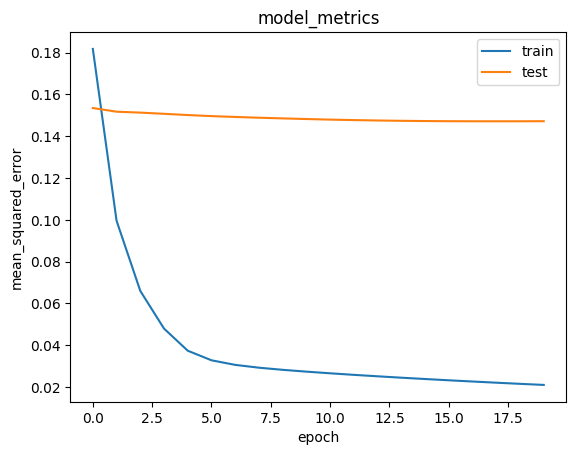

In [ ]:
plt.plot(history.history["mse"])
plt.plot(history.history["val_mse"])
plt.title("model_metrics")
plt.ylabel("mean_squared_error")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper right")
plt.show()

In [ ]:
random_user = np.random.choice(user_ids, 1)[0]
print("Random user id: ", random_user)

anime_watched_by_user = all_ratings[all_ratings["user_id"] == random_user]

anime_not_watched = anime_df[
    ~anime_df["MAL_ID"].isin(anime_watched_by_user["anime_id"].values)
]["MAL_ID"]
anime_not_watched = list(
    set(anime_not_watched).intersection(set(anime2anime_encoded.keys()))
)

anime_not_watched = [[anime2anime_encoded.get(x)] for x in anime_not_watched]
user_encoder = user2user_encoded.get(random_user)
user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_watched), anime_not_watched)
)

Random user id:  153650


In [ ]:
user_anime_array = [user_anime_array[:, 0], user_anime_array[:, 1]]

In [ ]:
ratings = model.predict(user_anime_array).flatten()

top_ratings_indices = ratings.argsort()[-20:][::-1]
recommended_anime_ids = [
    anime2anime_encoded.get(anime_not_watched[x][0]) for x in top_ratings_indices
]

print("Showing recommendations for users: {}".format(random_user))
print("===" * 9)
print("Anime with high ratings from user")
print("----" * 8)

top_anime_user = (
    anime_watched_by_user.sort_values(by="rating", ascending=False)
    .head(10)["anime_id"]
    .values
)
anime_df_rows = all_anime[all_anime["MAL_ID"].isin(top_anime_user)]
for row in anime_df_rows.itertuples():
    print(row.Name, ":", row.Genres)

print("----" * 8)
print("Top 10 anime recommendation")
print("----" * 8)

recommended_anime = all_anime[all_anime["MAL_ID"].isin(recommended_anime_ids)]
recommended_anime

279/279 [==============================] - 0s 1ms/step
Showing recommendations for users: 153650
Anime with high ratings from user
--------------------------------
Omoide Poroporo : Slice of Life, Drama, Romance
--------------------------------
Top 10 anime recommendation
--------------------------------


,MAL_ID,Name,Genres,Type,Studios,Source,features
214,238,Rekka no Honoo,"Action, Adventure, Martial Arts, Shounen, Supe...",TV,Studio Pierrot,Manga,"Action, Adventure, Martial Arts, Shounen, Supe..."
231,255,Jungle wa Itsumo Hare nochi Guu Final,"Slice of Life, Comedy",OVA,Shin-Ei Animation,Manga,"Slice of Life, Comedy OVA Manga"
604,646,Haunted Junction,"Comedy, Supernatural, School, Shounen",TV,Studio Deen,Manga,"Comedy, Supernatural, School, Shounen TV Manga"
1539,1693,Reideen,"Action, Mecha, Sci-Fi",TV,Production I.G,,"Action, Mecha, Sci-Fi TV"
1972,2154,Tekkon Kinkreet,"Action, Adventure, Psychological, Supernatural",Movie,Studio 4°C,Manga,"Action, Adventure, Psychological, Supernatural..."
2569,2791,Makasete Iruka!,"Action, Comedy, School",OVA,Unknown,Manga,"Action, Comedy, School OVA Manga"
3712,4554,Dokkiri Doctor,"Slice of Life, Comedy, School",TV,Studio Pierrot,Manga,"Slice of Life, Comedy, School TV Manga"
4925,7174,Usaru-san,Kids,Special,OLM,,Kids Special
